# Predict __Price of a bottle of wine__

# Summary

The data summarize **258210** wine reviews:

__175000__ are the training set, the data on which to train your models;

The remaining __83210__ observations constitute the validation set (or score set), or the data on which you must make the estimate for the submission. The validation set at your disposal obviously does not contain the variable price, the price of the bottle of wine that the goal of your forecast.

 

## File descriptions

    - train.csv - the training set
    - test.csv - the test set
    - Sample_Submission.csv  - a sample submission file in the correct format
 
### Data fields

**country (String)** The country that the wine is from

**province (String)** The province or state that the wine is from

**region_1 (String)** The wine growing area in a province or state (ie Napa)

**region_2 (String)** Sometimes there are more specific regions within the wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank

**winery (String)** The winery that made the wine

**variety (String)** The type of grapes used to make the wine (ie Pinot Noir)

**designation (String)** The vineyard within the winery where the grapes that made the wine are from

**taster_name (String)** taster name

**taster_twitter_handle (String)** taster twitter account name

**description (String)** A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.

**points (Numeric)** Number of points WineEnthusiast rated the wine on a scale of **1-100**

## __TARGET: price (Numeric) The cost for a bottle of wine__

The accuracy of your forecasts will be evaluated using the Root Mean Squared Error (RMSE).

An example code for the calculation:

RMSE = sqrt (mean ((predicted-true) ^ 2))

This leaderboard is calculated with approximately 30% of the test data.

The final results will be based on the other 70%, so the final standings may be different

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("./Datasets/train.csv")
test = pd.read_csv("./Datasets/test.csv")

In [4]:
train.tail()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
174995,US,"Named for the clone so beloved by winemakers, ...",Old Wente,93.965358,55.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Lynmar 2014 Old Wente Chardonnay (Russian Rive...,CHARDONNAY,Lynmar,51364
174996,Portugal,"This is a fresh, fruity and juicy wine. Shot t...",Bojador Branco,85.975164,14.0,Alentejano,NaN,NaN,Roger Voss,@vossroger,Espaço Rural 2014 Bojador Branco White (Alente...,PORTUGUESE WHITE,Espaço Rural,87223
174997,Spain,"Clean and toasty, with mineral and the slighte...",Cordon Negro Brut,85.030109,10.0,Catalonia,Cava,NaN,NaN,NaN,NaN,SPARKLING BLEND,Freixenet,142217
174998,US,"A lovely Pinot Noir, showing flamboyantly ripe...",Estate Grown,90.867770,65.0,California,Russian River Valley,Sonoma,NaN,NaN,NaN,PINOT NOIR,Donum,64741
174999,US,"Made to benefit the exploratory organization, ...",National Geographic Ocean Reserve Blanc de Blancs,91.881217,50.0,California,Green Valley,Sonoma,Virginie Boone,@vboone,Iron Horse 2013 National Geographic Ocean Rese...,SPARKLING BLEND,Iron Horse,91621


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
id                       175000 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 18.7+ MB


In [6]:
train.id.nunique()

124675

## Investigating on __NAN__ values

We have 14 columns and we need to investigate each and everyone of them, we have a total of $175000$ examples

In [7]:
train.dtypes.value_counts()

object     11
float64     2
int64       1
dtype: int64

## Numerical 

In [8]:
train.columns[train.dtypes != 'object']

Index(['points', 'price', 'id'], dtype='object')

### Points

In [9]:
train[train.points.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id


In [10]:
train.points.isnull().sum()

0

### Price

In [11]:
train[train.price.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id


In [12]:
train.price.isnull().sum()

0

### Id

In [13]:
train[train.id.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id


In [14]:
train.id.isnull().sum()

0

It clear that there is no issue with numerical features, regarding missing values

## Categorical features

In [15]:
train.columns[train.dtypes == 'object']

Index(['country', 'description', 'designation', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

### Country

In [16]:
train[train.country.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
3571,NaN,"Scents of clover, stem, green herb and red cur...",Wismer-Parke Vineyard,89.215051,34.0,NaN,NaN,NaN,Paul Gregutt,@paulgwine,Bachelder 2014 Wismer-Parke Vineyard Pinot Noir,PINOT NOIR,Bachelder,38898
4887,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,86.801277,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,CHINURI,Gotsa Family Wines,913
8233,NaN,This white blend is comprised of 50% Chardonna...,Nikolaevo Unison Chardonnay-Gewürtztraminer,89.017591,16.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2014 Nikolaevo Unison Chardonnay-Gewü...,WHITE BLEND,Ross-idi,81955
13247,NaN,Made from 100% Melnick this garnet-colored win...,Nobile,87.959122,23.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Logodaj 2013 Nobile Melnik,MELNIK,Logodaj,85603
16758,NaN,Just a whiff of citrus shows on the restrained...,Steirische Klassik,89.002808,25.0,NaN,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Neumeister 2016 Steirische Klassik Sauvignon B...,SAUVIGNON BLANC,Neumeister,45247


In [17]:
print("We have {:.4} % of missing values in the feature Country".format(train.country.isnull().sum()*100/train.index.nunique()))

We have 0.02686 % of missing values in the feature Country


### Description

In [18]:
train[train.description.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id


In [19]:
train.description.isnull().sum()

0

### Designation

In [20]:
train[train.designation.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
8,US,This wine plays close to the edge of overripe-...,NaN,85.908686,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Matrix 2013 Pinot Noir (Russian River Valley),PINOT NOIR,Matrix,112993
11,Chile,"Sort of sweet on the bouquet, with hints of le...",NaN,83.951573,8.0,Curicó Valley,NaN,NaN,NaN,NaN,NaN,CHARDONNAY,San Nicolas,138625
24,US,"Not a whole lot of oomph in this dry, unidimen...",NaN,84.961308,20.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,NaN,MERLOT,Gainey,125232


In [21]:
 print("We have {:.4} % of missing values in the feature Designation".format(train.designation.isnull().sum()*100/train.index.nunique()))

We have 29.87 % of missing values in the feature Designation


### Province

In [22]:
train[train.province.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
3571,NaN,"Scents of clover, stem, green herb and red cur...",Wismer-Parke Vineyard,89.215051,34.0,NaN,NaN,NaN,Paul Gregutt,@paulgwine,Bachelder 2014 Wismer-Parke Vineyard Pinot Noir,PINOT NOIR,Bachelder,38898
4887,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,86.801277,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,CHINURI,Gotsa Family Wines,913
8233,NaN,This white blend is comprised of 50% Chardonna...,Nikolaevo Unison Chardonnay-Gewürtztraminer,89.017591,16.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2014 Nikolaevo Unison Chardonnay-Gewü...,WHITE BLEND,Ross-idi,81955
13247,NaN,Made from 100% Melnick this garnet-colored win...,Nobile,87.959122,23.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Logodaj 2013 Nobile Melnik,MELNIK,Logodaj,85603
16758,NaN,Just a whiff of citrus shows on the restrained...,Steirische Klassik,89.002808,25.0,NaN,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Neumeister 2016 Steirische Klassik Sauvignon B...,SAUVIGNON BLANC,Neumeister,45247


In [23]:
print("We have {:.4} % of missing values in the feature Province".format(train.province.isnull().sum()*100/train.index.nunique()))

We have 0.02686 % of missing values in the feature Province


In [24]:
train.province.isnull().sum()

47

### Region 1

In [25]:
train[train.region_1.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
11,Chile,"Sort of sweet on the bouquet, with hints of le...",NaN,83.951573,8.0,Curicó Valley,NaN,NaN,NaN,NaN,NaN,CHARDONNAY,San Nicolas,138625
17,Chile,"Opaque in color, with herbal aromas that inclu...",Gran Reserva,87.973036,30.0,Casablanca Valley,NaN,NaN,NaN,NaN,NaN,SYRAH,Casas del Bosque,35319
21,Greece,"Lemon and lime aromas are followed by citrus, ...",Atlantis,87.132911,17.0,Santorini,NaN,NaN,NaN,NaN,NaN,WHITE BLEND,Argyros,132328
25,Portugal,"Soft and ripe, a flavor of crushed strawberrie...",Portada Winemaker's Selection,84.964618,7.0,Lisboa,NaN,NaN,NaN,NaN,NaN,ROSé,DFJ Vinhos,32885


In [26]:
print("We have {:.4} % of missing values in the feature Region 1".format(train.region_1.isnull().sum()*100/train.index.nunique()))

We have 16.31 % of missing values in the feature Region 1


In [27]:
train.region_1.isnull().sum()

28534

### Region 2

In [28]:
train[train.region_2.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
5,Spain,This brut nature is citric and bubbly on the p...,Brut Nature Reserva,83.118679,13.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Mas Fi NV Brut Nature Reserva Sparkling (Cava),SPARKLING BLEND,Mas Fi,20153
6,France,"A ripe wine that has red-berry fruits, slices ...",Cuvée Prestige,88.320513,35.0,Bordeaux,Bordeaux Supérieur,NaN,Roger Voss,@vossroger,Château Tayet 2014 Cuvée Prestige (Bordeaux S...,BORDEAUX-STYLE RED BLEND,Château Tayet,72654


In [29]:
print("We have {:.4} % of missing values in the feature Region 2".format(train.region_2.isnull().sum()*100/train.index.nunique()))

We have 56.92 % of missing values in the feature Region 2


In [30]:
train.region_2.isnull().sum()

99606

### Taster Name 

In [31]:
train[train.taster_name.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
7,Italy,From one of Sicily's most beautiful and promis...,Baccante,85.173533,42.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,NaN,WHITE BLEND,Abbazia Santa Anastasia,117626


In [32]:
print("We have {:.4} % of missing values in the feature Taster Name".format(train.taster_name.isnull().sum()*100/train.index.nunique()))

We have 62.57 % of missing values in the feature Taster Name


In [33]:
train.taster_name.isnull().sum()

109491

### Taster Twitter Handle

In [34]:
train[train.taster_twitter_handle.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
7,Italy,From one of Sicily's most beautiful and promis...,Baccante,85.173533,42.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,NaN,WHITE BLEND,Abbazia Santa Anastasia,117626


In [35]:
print("We have {:.4} % of missing values in the feature Taster Twitter Handle".format(train.taster_twitter_handle.isnull().sum()*100/train.index.nunique()))

We have 64.46 % of missing values in the feature Taster Twitter Handle


In [36]:
train.taster_twitter_handle.isnull().sum()

112810

### Title 

In [37]:
train[train.title.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
7,Italy,From one of Sicily's most beautiful and promis...,Baccante,85.173533,42.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,NaN,WHITE BLEND,Abbazia Santa Anastasia,117626
9,Italy,This basic Prosecco is perfectly quaffable tha...,Lellè Extra Dry,81.929514,14.0,Veneto,Prosecco,NaN,NaN,NaN,NaN,GLERA,Fattoria Giuseppe Savini,32542


In [38]:
print("We have {:.4} % of missing values in the feature Title".format(train.title.isnull().sum()*100/train.index.nunique()))

We have 53.03 % of missing values in the feature Title


In [39]:
train.title.isnull().sum()

92811

### Variety 

In [40]:
train[train.variety.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
86403,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88.046742,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen,86909


In [41]:
print("We have {:.4} % of missing values in the feature Variety".format(train.variety.isnull().sum()*100/train.index.nunique()))

We have 0.0005714 % of missing values in the feature Variety


In [42]:
train.variety.isnull().sum()

1

### Winery

In [43]:
train[train.winery.isnull()].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id


In [44]:
print("We have {:.4} % of missing values in the feature Winery".format(train.winery.isnull().sum().sum()*100/train.index.nunique()))

We have 0.0 % of missing values in the feature Winery


In [45]:
train.winery.isnull().sum()

0

## Analysis 

### Numerical variables 

In [46]:
numerical_train = train[train.columns[train.dtypes != 'object']]

In [47]:
numerical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 3 columns):
points    175000 non-null float64
price     175000 non-null float64
id        175000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 4.0 MB


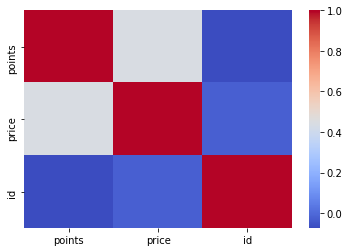

In [48]:
sns.heatmap(numerical_train.corr(),cmap='coolwarm')

### Categorical 

In [49]:
categorical_train = train[train.columns[train.dtypes == 'object']]
categorical_train.head()

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos
1,France,"A solid, chunky wine, with a structure that is...",NaN,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier
2,France,"This is powerful and concentrated, with the hi...",NaN,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline


In [50]:
import statsmodels.api as sm

In [51]:
from statsmodels.formula.api import ols 

In [64]:
Anove_test_F_value = []
Anove_test_P_value = []
variable_name_list = []

for variable in categorical_train.columns:
    print(variable)
    mod = ols('price ~ '+variable, data = train).fit()
    aov_table = sm.stats.anova_lm(mod, type=2)
    Fvalue = aov_table.loc[variable, 'F']
    Pvalue = aov_table.loc[variable, 'PR(>F)']
    variable_name_list.append(variable)
    Anove_test_F_value.append(Fvalue)
    Anove_test_P_value.append(Pvalue)
    
Anova_categorical_variable_test = pd.DataFrame({'Variable':variable_name_list, "F Value":Anove_test_F_value, \
                                               "P Value":Anove_test_P_value})

country
description


MemoryError: Unable to allocate array with shape (123810, 123810) and data type float64

In [58]:
>>> import statsmodels.api as sm
>>> from statsmodels.formula.api import ols
>>> moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
>>> data = moore.data
>>> data = data.rename(columns={"partner.status" :
...                             "partner_status"}) # make name pythonic

for var in data.columns:
        oore_lm = ols('conformity ~'+var,
...                 data=data).fit()
        table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
        print(table)
# >>> moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
# ...                 data=data).fit()
# >>> table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
# >>> print(table)

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  
                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

   

In [55]:
data

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36
5,low,6,low,18
6,low,12,medium,51
7,low,4,medium,44
8,low,13,low,31
9,low,12,low,36
